In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
data = pd.read_csv('data/unconv.zip')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Задание 5.1

Постройте корреляционную матрицу факторов, включив в неё целевой признак. Ответьте на следующие вопросы:

1. Выберите топ-3 факторов, наиболее коррелированных с целевой переменной:
2. Вычислите ранг полученной матрицы корреляций:
3. Вычислите определитель матрицы корреляций.
4. Что можно сказать об обусловенности корреляционной матрицы?
 + Корреляционная матрица плохо обусловлена, определитель близок к 0


Rank: 8
Determinant: 0.0007


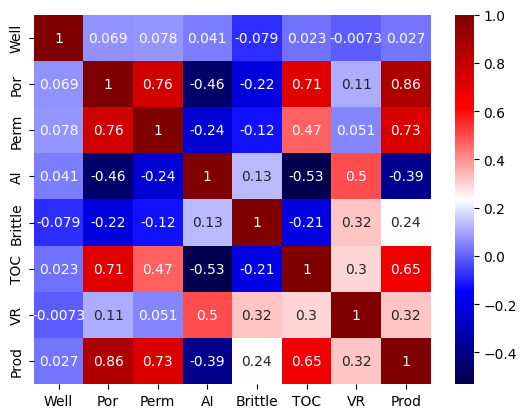

In [3]:
C = data.corr()
sns.heatmap(C, annot=True, cmap='seismic');
print('Rank:', np.linalg.matrix_rank(C))
print('Determinant: {:.4f}'.format(np.linalg.det(C)))

## Задание 5.2

In [4]:
X = data.drop('Prod', axis=1)
y = data['Prod'].values
index = ['intercept']+list(X.columns)
n = X.shape[0]
X = np.column_stack((np.ones(n), X))
w_hat = np.linalg.inv(X.T@X)@X.T@y
print(pd.Series(np.round(w_hat, 0), index=index))

intercept   -1232.0
Well            0.0
Por           230.0
Perm          116.0
AI           -365.0
Brittle        25.0
TOC           -78.0
VR            785.0
dtype: float64


## Задание 5.3

In [5]:
x_new = np.array([1, 106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
y_new = 4748.315024
y_new_pred = x_new @ w_hat
print(np.round(np.abs(y_new_pred - y_new), 0))

25.0


In [6]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = X @ w_hat
print('Result MAPE {:.1f}:'.format(mean_absolute_percentage_error(y, y_pred)*100))

Result MAPE 3.6:


## Задание 5.5

In [8]:
from sklearn.metrics import mean_absolute_percentage_error
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values
index = ['intercept']+list(X.columns)
n = X.shape[0]
X = np.column_stack((np.ones(n), X))
w_hat = np.linalg.inv(X.T@X)@X.T@y
y_pred = X @ w_hat
print(pd.Series(np.round(w_hat, 0), index=index))
print(f'MAPE: {mean_absolute_percentage_error(y, y_pred)*100:.1f} %')

intercept   -1835.0
Por           293.0
AI           -200.0
Brittle        28.0
VR            517.0
dtype: float64
MAPE: 4.0 %


In [9]:
print('Result MAPE {:.1f}:'.format(mean_absolute_percentage_error(y, y_pred)*100))

Result MAPE 4.0:
